# Final Project for Research Computing - Laura Penrose

### Investigate changes in sea ice concentration over the Arctic and Antarctic over 30 years between 1982 and 2019

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
import cartopy.crs as ccrs
import cartopy 
from matplotlib import pyplot as plt
import datetime

## Load sea ice concentration data 

In [2]:
import pooch 
url = "https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.oisst.v2/icec.mnmean.nc"
fname = pooch.retrieve(url, known_hash=None)
print(fname)

/home/jovyan/.cache/pooch/46f4671f362c39b2f9f95673a30bdc33-icec.mnmean.nc


In [3]:
ds = xr.open_dataset(fname)
ds.head()

<xarray.Dataset>
Dimensions:    (time: 5, lat: 5, lon: 5, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 85.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 1982-04-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            4.0.0
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

# 1. Compare sea ice extent in the Arctic and Antarctic in 1981 and 2019

#### Select time periods for both 1982 and 2019 and then plot the sea ice extent for both the Arctic and Antarctic

In [56]:
icec_1981 = ds.sel(time=slice('1981-12-01','1982-12-01'))    
icec_1981_mean = icec_1981.icec.mean(dim='time')
iceclevel = np.arange(0, 110, 10)

In [57]:
icec_2019 = ds.sel(time=slice('2018-12-01','2019-12-01'))    
icec_2019_mean = icec_2019.icec.mean(dim='time')

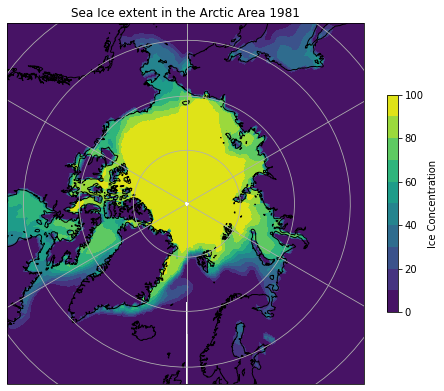

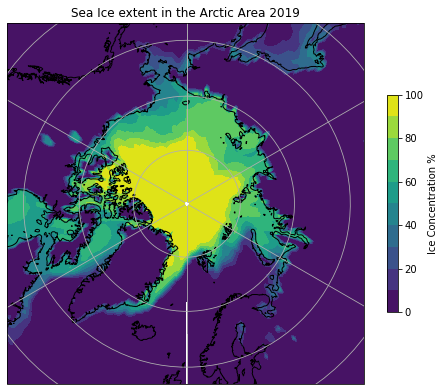

In [40]:
figure = plt.figure(figsize = (8,8))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_1981_mean.where(icec_1981_mean>0, 0)
seaice_1981 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel,extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_1981, shrink=0.5)
plot.set_label('Ice Concentration')
ax.set_title('Sea Ice extent in the Arctic Area 1981')

figure = plt.figure(figsize = (8,8))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_2019_mean.where(icec_2019_mean>0, 0)
seaice_2019 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel,extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_2019, shrink=0.5)
plot.set_label('Ice Concentration %')
ax.set_title('Sea Ice extent in the Arctic Area 2019');

#### There seems to be clear differences in the sea ice concentration in the Arctic between 1982 and 2019 specifically in the top part of these plots between western North America and Russia. There is a significant decrease in ice concentration from close to 100 % down to 60 % in parts of this area. The central part at the North Pole continues to have full sea ice concentration and some of the areas that are at lower latitudes (closer to the equator) have sea ice concentrations that don't appear to vary much between the two time points such as along both west and east coasts of Greenland. Other areas have decreased sea ice concentration as noted. 

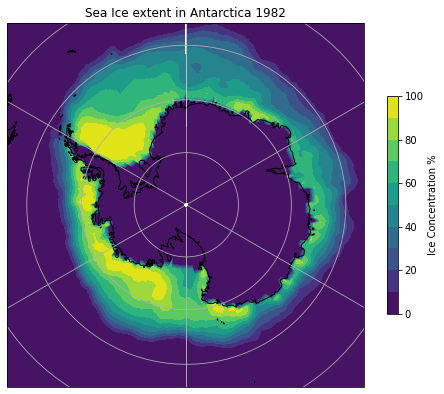

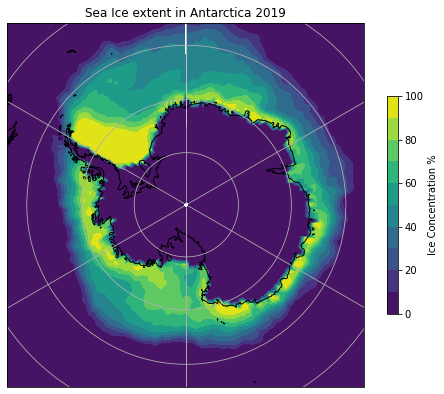

In [41]:
figure = plt.figure(figsize = (8,8))
extent = [-180, 180, -90, -56]
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_1981_mean.where(icec_1981_mean>0, 0)
seaice_1981 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel, extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_1981, shrink=0.5)
plot.set_label('Ice Concentration %')
ax.set_title('Sea Ice extent in Antarctica 1982')

figure = plt.figure(figsize = (8,8))
extent = [-180, 180, -90, -56]
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_2019_mean.where(icec_2019_mean>0, 0)
seaice_2019 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel, extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_2019, shrink=0.5)
plot.set_label('Ice Concentration %')
ax.set_title('Sea Ice extent in Antarctica 2019');

#### The Antarctic plot looks like there isn't too much variation in sea ice extent between 1982 and 2019. However, there might be slightly more variation in the Ross and Weddell Sea. In my hypothesis I suspected that there would be more of a dramatic difference in sea ice concentration from 1982 to 2019 

## 2. Global Sea Ice concentration anomaly 

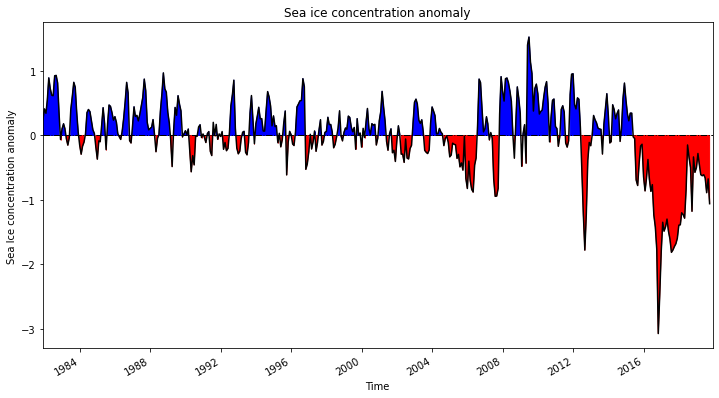

In [31]:
icec = ds.sel(time=slice('1981-12-01','2019-10-01'))
gb = icec.groupby('time.month')

def remove_time_mean(gb):
    return gb - gb.mean('time')

ds_anom = gb.apply(remove_time_mean)
ds_mean = ds_anom.icec.mean(dim=('lat','lon'))
ds_mean.plot(figsize=(12,6), c='black')
plt.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')
plt.ylabel('Sea Ice concentration anomaly')
time = ds_mean.time.values
plt.xlim([datetime.date(1981, 12, 1), datetime.date(2019, 12, 1)])
plt.fill_between(time, ds_mean.where(ds_mean<0),0, color = 'red')
plt.fill_between(time, ds_mean.where(ds_mean>0),0, color = 'blue')
plt.title('Sea ice concentration anomaly');

#### This anomaly plot indicates that the concentration of sea ice has varied over the past 30 years but from ~2015 to today the concentrations has been decreasing. The anomaly has been more significantly decreased than any other years.

#### From this anomaly, I wanted to see how this signal compares in the Arctic and the Antarctic. 

## 2b. Northern vs Southern Hemisphere Sea ice concentration anomaly comparison

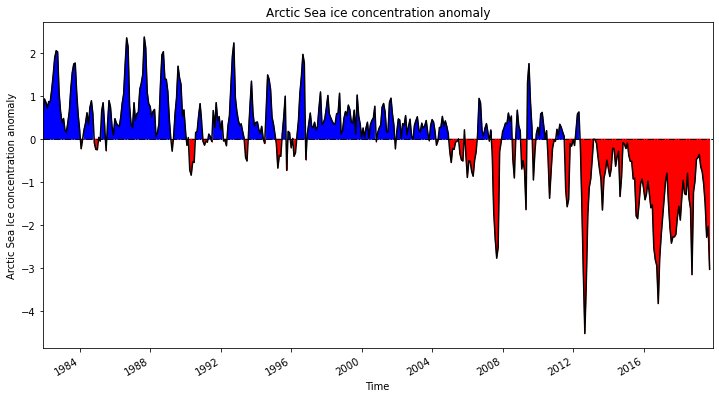

In [67]:
icec = ds.sel(lat=slice(90, 0), time=slice('1981-12-01','2019-10-01'))
gb = icec.groupby('time.month')

def remove_time_mean(gb):
    return gb - gb.mean('time')

ds_anom = gb.apply(remove_time_mean)
ds_mean = ds_anom.icec.mean(dim=('lat','lon'))
ds_mean.plot(figsize=(12,6), c='black')
plt.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')
plt.ylabel('Arctic Sea Ice concentration anomaly')
time = ds_mean.time.values
plt.xlim([datetime.date(1981, 12, 1), datetime.date(2019, 12, 1)])
plt.fill_between(time, ds_mean.where(ds_mean<0),0, color = 'red')
plt.fill_between(time, ds_mean.where(ds_mean>0),0, color = 'blue')
plt.title('Arctic Sea ice concentration anomaly');

#### 

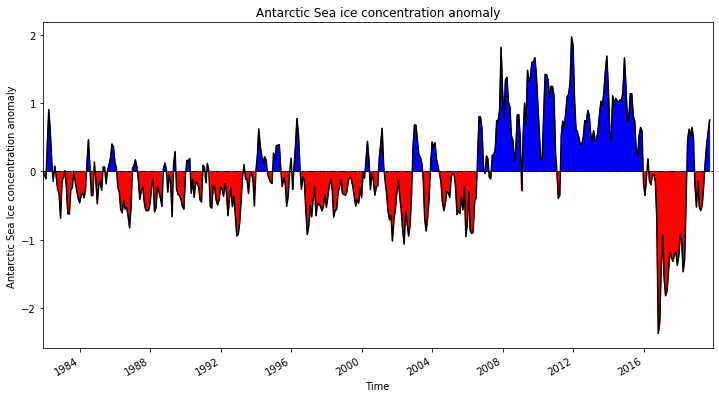

In [38]:
icec = ds.sel(lat=slice(0, -90), time=slice('1981-12-01','2019-10-01'))
gb = icec.groupby('time.month')

def remove_time_mean(gb):
    return gb - gb.mean('time')

ds_anom = gb.apply(remove_time_mean)
ds_mean = ds_anom.icec.mean(dim=('lat','lon'))
ds_mean.plot(figsize=(12,6), c='black')
plt.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')
plt.ylabel('Antarctic Sea Ice concentration anomaly')
time = ds_mean.time.values
plt.xlim([datetime.date(1981, 12, 1), datetime.date(2019, 12, 1)])
plt.fill_between(time, ds_mean.where(ds_mean<0),0, color = 'red')
plt.fill_between(time, ds_mean.where(ds_mean>0),0, color = 'blue')
plt.title('Antarctic Sea ice concentration anomaly');

#### The plot of Antarctic sea ice concentration anomaly indicates that Antarctic has had mostly negative sea ice concentration between 1981 and 2019 with a few minor increases. However, between 2007 and 2015, there was a period of increased sea ice concentration. 

# 3. Import Northern Hemisphere Sea Ice amount data 

In [46]:
url = "https://www.ncdc.noaa.gov/snow-and-ice/extent/sea-ice/N/10/data.csv"
df = pd.read_csv(url, skiprows = 3, sep=',')
df.head()

,Date,Value,Anomaly
0,1979,8.75,0.40
1,1980,9.18,0.83
2,1981,8.86,0.51
3,1982,9.42,1.07
4,1983,9.33,0.98


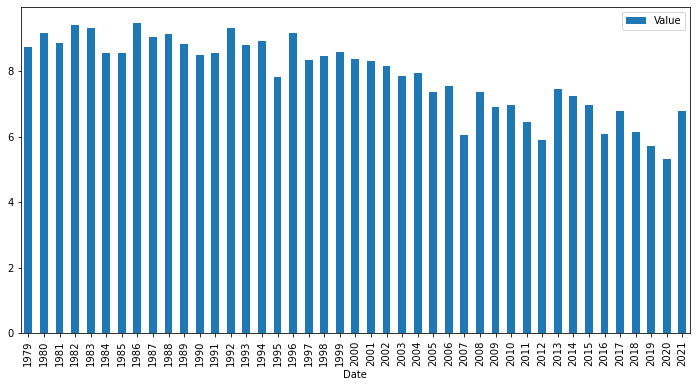

In [54]:
df.plot(figsize=(12,6), kind='bar', x = 'Date', y = 'Value');